In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from pprint import pprint
import csv
from config import key

In [256]:
url = "https://na1.api.riotgames.com/lol/match/v4/matches/"
api_f= "api_key="

In [257]:
#csv files to work through adjust the file path to needs
#this is match data
file = "data/matchinfo.csv"
#this is a list of game ids to get data from
qfile = "data/queue.csv"

#reading in the game ids
queue = pd.read_csv(qfile, header = None)

#partic_data = response['participants']

#trying to create a loop to iterate through our gameids
#so that we can get more than just the one data set
queue_random = queue.sample(4)
games = []

#jsonifying the api data
for index,row in queue_random.iterrows():
    n_url = (url + str(row[0]) + "/?"+ api_f + key) 
    response = requests.get(n_url).json()
    games.append(response) 
    


In [258]:
#identifying each players individual stats
player_stats = { 
    "player_number" : [],
    "kills": [],
    "assists" : [],
    "deaths" : [],
    "inhibitor_kills" : [],
    "largest_multi" : [],
    "lane" : [],
    "result" : [],
                    }
#identifying each players minion stats
player_minion = {
    "total_minions" : [],
    "creeps_per_min" : []
                }
#identifying each players damage stats
player_dmg = {
    "total_dmg": [],
    "largest_crit" : [],
    "magic_dmg" : [],
    "magic_dmg_2_champ" : [],
    "magic_dmg_taken" : [],
    "physc_dmg" : [],
    "physc_dmg_taken" : [],
    "physc_dmg_2_champ" : [],
    "total_dmg_2_champ" : [],
    "total_dmg_tkn" : [],
    
            }
#identifying each players gold stats
player_gold = {
    
    "total_gold" : [],
    "total_spent" :[]
            }


team_stats = {
    
    "team": [],
    "towers_killed" : [],
    "dragons_killed" : [],
    "first_tower" : [],
    "first_inhibitor" : [],
    "first_blood" : [],
    "result" : [],
    
        }


for game in games:
    try:
        players = game["participants"]
        teams = game["teams"]
        for player in players:
            player_stats["player_number"].append(player["participantId"])
            player_stats["lane"].append(player["timeline"]["lane"])
            player_stats["result"].append(int(player["stats"]["win"]))
            player_stats["kills"].append(player["stats"]["kills"])
            player_stats["assists"].append(player["stats"]["assists"])
            player_stats["deaths"].append(player["stats"]["deaths"])
            player_stats["inhibitor_kills"].append(player["stats"]["inhibitorKills"])
            player_stats["largest_multi"].append(player["stats"]["largestMultiKill"])
            player_dmg["total_dmg"].append(int(player["stats"]["totalDamageDealt"]))
            player_dmg["largest_crit"].append(int(player["stats"]["largestCriticalStrike"]))
            player_dmg["magic_dmg"].append(int(player["stats"]["magicDamageDealt"]))
            player_dmg["magic_dmg_taken"].append(int(player["stats"]["magicalDamageTaken"]))
            player_dmg["magic_dmg_2_champ"].append(int(player["stats"]["magicDamageDealtToChampions"]))
            player_dmg["physc_dmg"].append(int(player["stats"]["physicalDamageDealt"]))
            player_dmg["physc_dmg_2_champ"].append(int(player["stats"]["physicalDamageDealtToChampions"]))
            player_dmg["physc_dmg_take"].append(int(player["stats"]["physicalDamageTaken"]))
            player_dmg["total_dmg_tkn"].append(int(player["stats"]["totalDamageTaken"]))
            player_dmg["total_dmg_2_champ"].append(int(player["stats"]["totalDamageDealtToChampions"]))
#            player_minion["total_minions"].append(int(player["stats"]["totalMinionsKilled"]))
#            player_minion["creeps_per_min"].append(int(player["timeline"]["creepsPerMinDeltas"]))
            player_gold["total_gold"].append(player["stats"]["goldEarned"])
            player_gold["total_spent"].append(player["stats"]["goldSpent"])
        for team in teams:
            team_stats["team"].append(team["teamId"])
            team_stats["towers_killed"].append(team["towerKills"])
            team_stats["dragons_killed"].append(team["dragonKills"])
            team_stats["first_tower"].append(int(team["firstTower"]))
            team_stats["first_inhibitor"].append(int(team["firstInhibitor"]))
            team_stats["first_blood"].append(int(team["firstBlood"]))
            team_stats["result"].append(int(team["win"]))          
    except:
            player_stats["player_number"].append(0)
            player_stats["lane"].append(0)
            player_stats["result"].append(0)
            player_stats["kills"].append(0)
            player_stats["assists"].append(0)
            player_stats["deaths"].append(0)
            player_stats["inhibitor_kills"].append(0)
            player_stats["largest_multi"].append(0)
            player_dmg["total_dmg"].append(0)
            player_dmg["largest_crit"].append(0)
            player_dmg["magic_dmg"].append(0)
            player_dmg["magic_dmg_taken"].append(0)
            player_dmg["magic_dmg_2_champ"].append(0)
            player_dmg["physc_dmg"].append(0)
            player_dmg["physc_dmg_2_champ"].append(0)
            player_dmg["physc_dmg_taken"].append(0)
            player_dmg["total_dmg_tkn"].append(0)
            player_dmg["total_dmg_2_champ"].append(0)
#            player_minion["total_minions"].append("N/a")
#            player_minion["creeps_per_min"].append("N/a")
            player_gold["total_gold"].append(0)
            player_gold["total_spent"].append(0)
            team_stats["team"].append(0)
            team_stats["towers_killed"].append(0)
            team_stats["dragons_killed"].append(0)
            team_stats["first_tower"].append(0)
            team_stats["first_inhibitor"].append(0)
            team_stats["first_blood"].append(0)
            team_stats["result"].append(0)
            


In [259]:
player_stats_df = pd.DataFrame(player_stats)
player_minion_df = pd.DataFrame(player_minion)
player_dmg_df = pd.DataFrame([player_dmg])
player_gold_df = pd.DataFrame(player_gold)
team_stats_df = pd.DataFrame(team_stats)

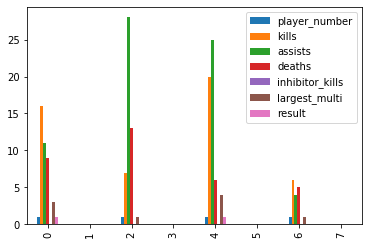

In [260]:
#group first counts on win and lose 
x_axis = (len(team_stats_df["result"]))
player_stats_df.plot(kind = 'bar')
#plt.show()